In [22]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

data = h5py.File("data_sample.hdf5", "r")
print("data keys: "+str(list(data.keys())))

data keys: ['images', 'labels', 'observation_days']


In [2]:
images = data["images"][:]
print("image shape: (sample, x_size, y_size, epoch) = "+str(images.shape))

labels = data["labels"][:]
obs_days = data["observation_days"][:]

image shape: (sample, x_size, y_size, epoch) = (72000, 21, 21, 48)


In [15]:
labels

array(['Constant', 'M33Cephei', 'M33Cephei', ..., 'Constant', 'Constant',
       'Constant'], dtype=object)

In [3]:
np.unique(labels.tolist())

array(['Asteroids', 'Constant', 'EmptyLigh', 'M33Cephei', 'RRLyrae',
       'Supernova'], dtype='<U9')

In [4]:
np.where(labels == 'Supernova'), np.where(labels == 'Asteroids'), np.where(labels == 'RRLyrae'), np.where(labels == 'EmptyLigh')

((array([    9,    12,    18, ..., 71595, 71597, 71617]),),
 (array([    4,    10,    13, ..., 70745, 70746, 70749]),),
 (array([   21,    22,    33, ..., 71895, 71896, 71898]),),
 (array([    6,    14,    23, ..., 71744, 71748, 71749]),))

In [5]:
obs_days[1] -  obs_days[0], obs_days[2] -  obs_days[1]

(0.9711000000024796, 7.951000000000931)

In [6]:
obs_days

array([52721.6178, 52722.5889, 52730.5399, 52785.4116, 52790.3945,
       52791.4407, 52792.4112, 52813.3392, 52816.5304, 52817.2882,
       52824.5807, 52851.5202, 52873.3954, 52876.4114, 52880.4249,
       52880.5795, 52900.3423, 52900.4913, 52904.3954, 52904.588 ,
       52904.5998, 52908.3446, 52908.5289, 52930.3819, 52934.3713,
       52934.5195, 52937.5438, 52938.2925, 52942.2523, 52944.3807,
       52964.3634, 52992.3196, 52992.3391, 52993.5899, 52999.2977,
       52999.3473, 53026.6053, 53083.598 , 53084.4558, 53105.3719,
       53109.5667, 53114.3153, 53117.475 , 53118.3672, 53120.3678,
       53121.5042, 53136.3261, 53138.4519])

In [7]:
def show_sample_trajectory(images, label, obs_days):
    fig, axes = plt.subplots(12, 4, figsize=(14, 50))
    axes = axes.ravel()
    for i in range(48):
        axes[i].imshow(images[:,:,i])
        axes[i].set_title('epoch {}'.format(i+1))
        axes[i].set_xlabel('{}, {}'.format(label, obs_days[i]))
    plt.tight_layout()
    plt.show()

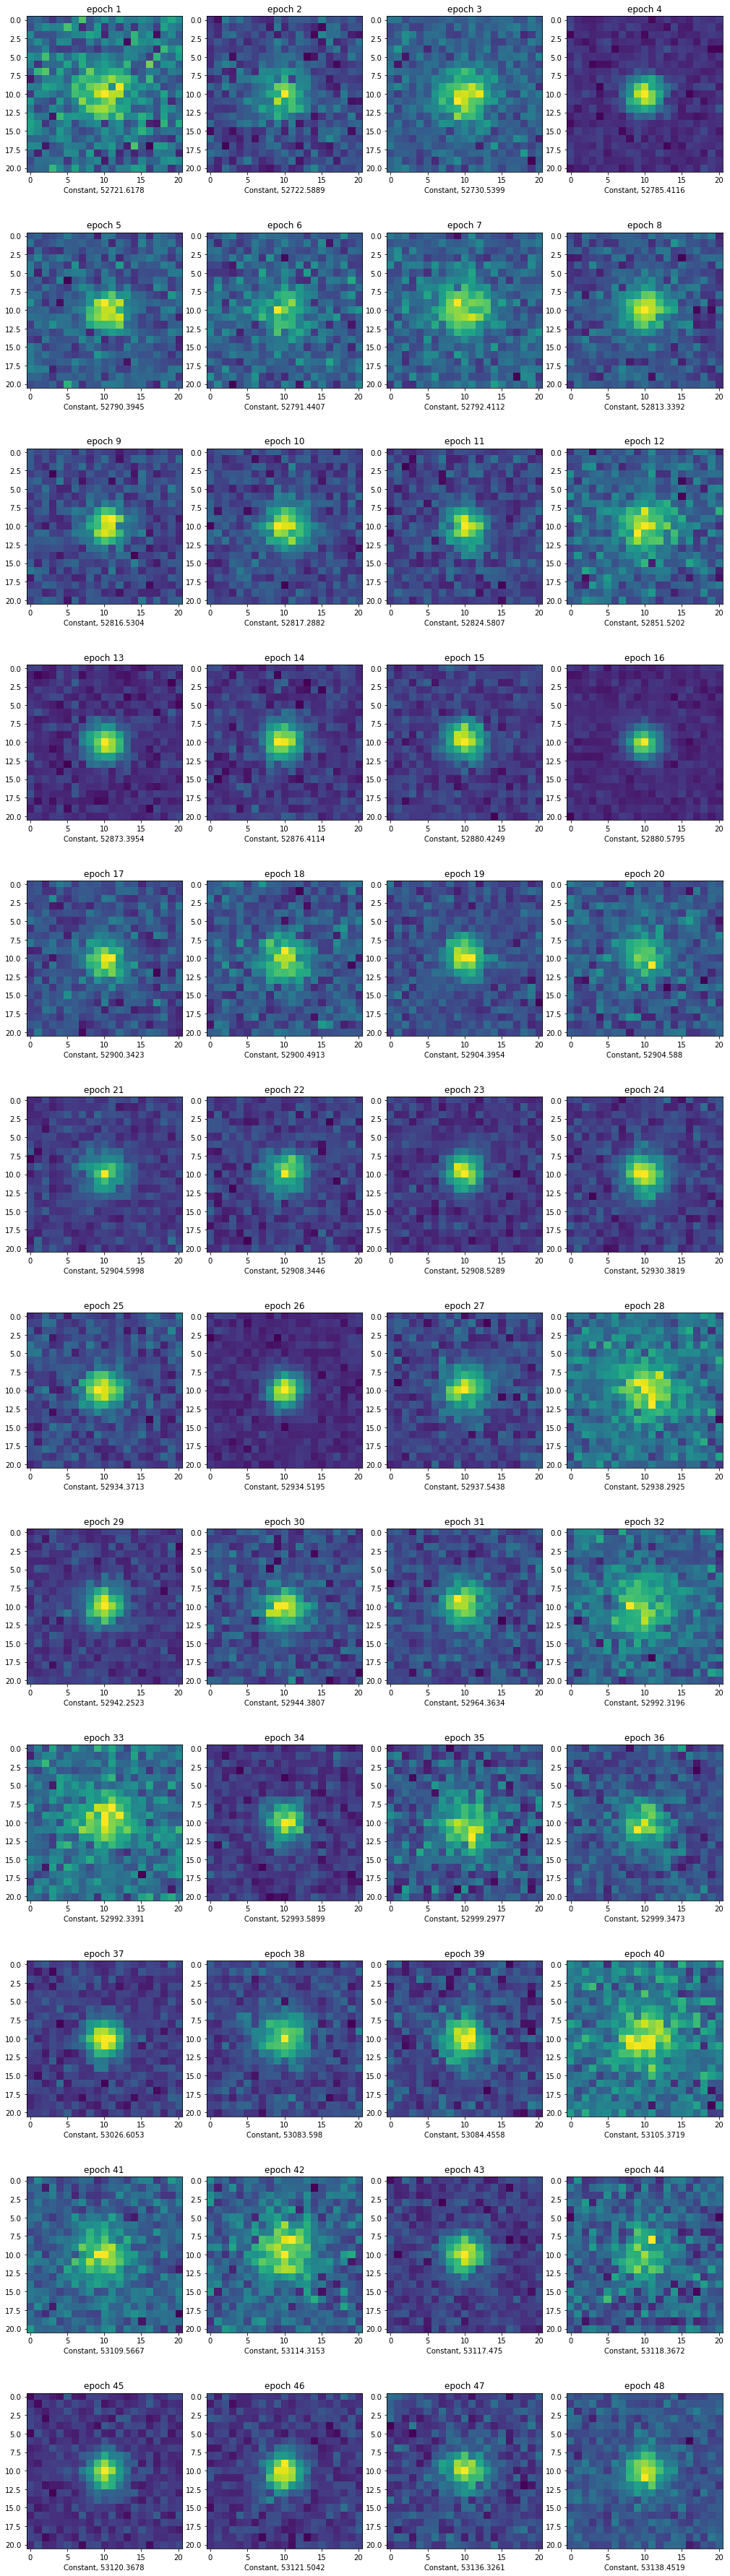

In [8]:
show_sample_trajectory(images[0], labels[0], obs_days)

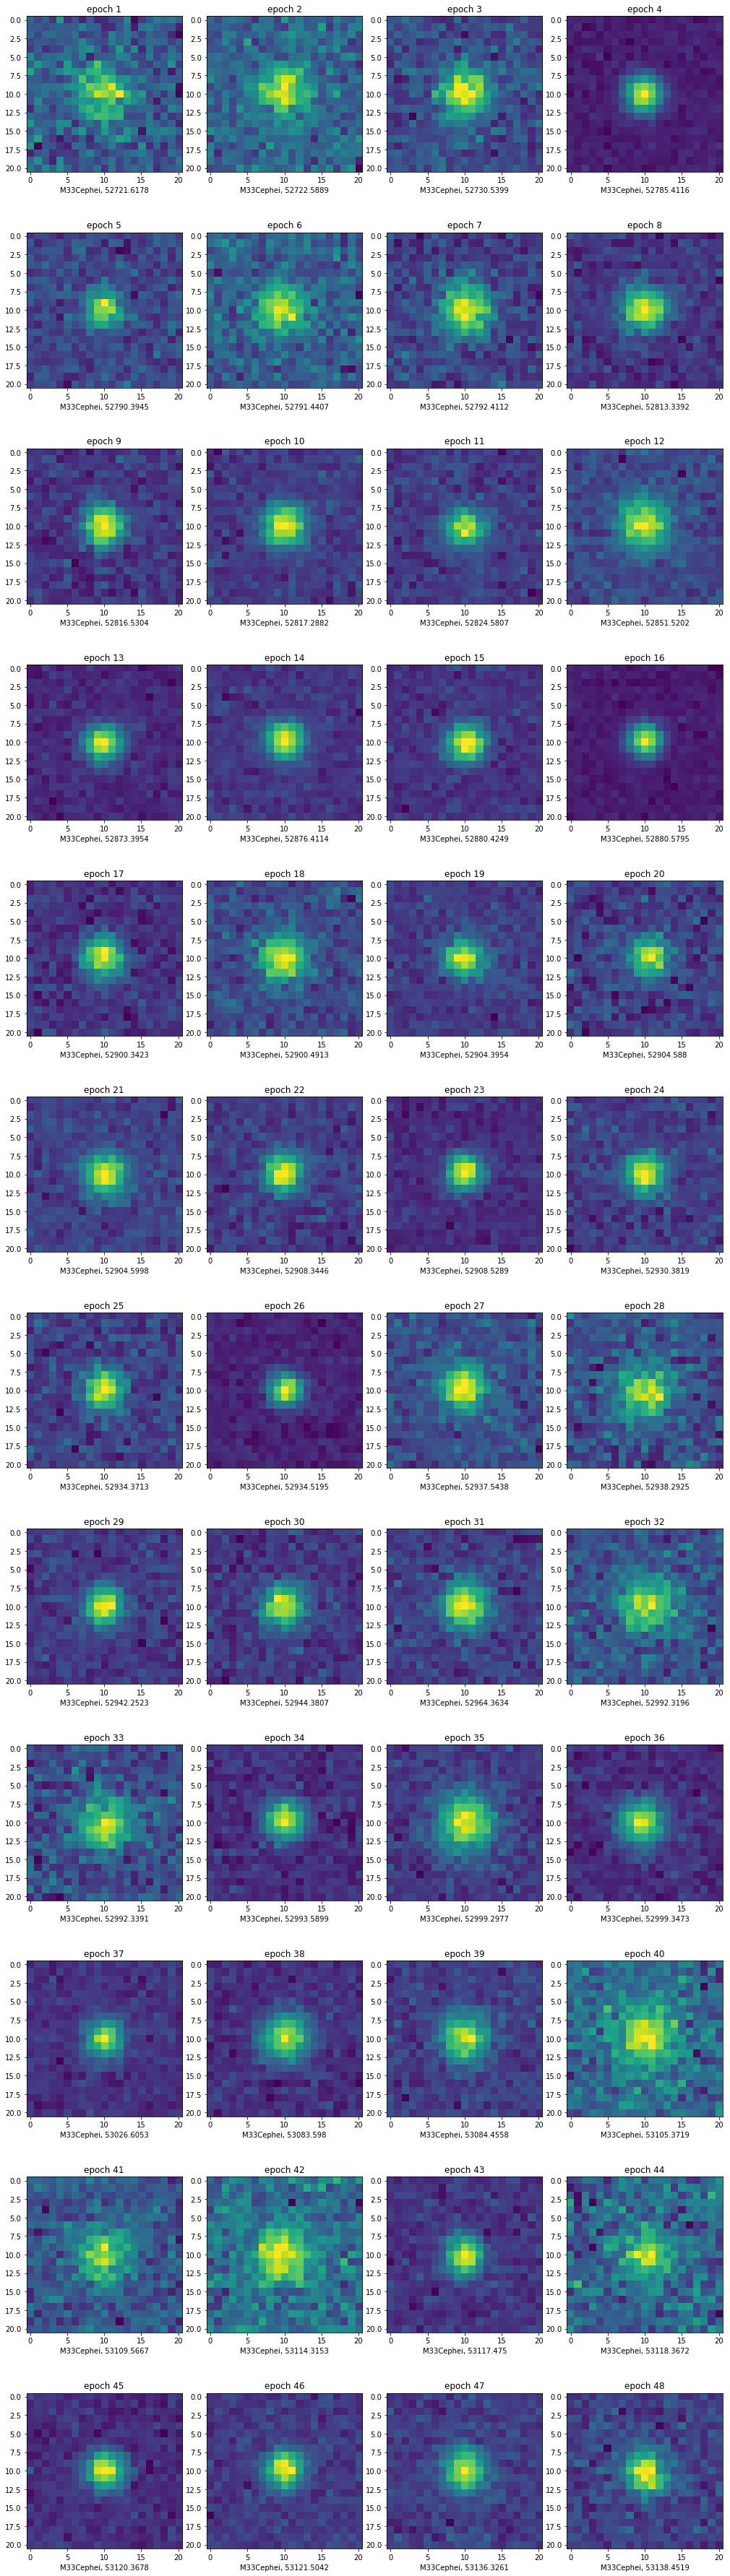

In [9]:
show_sample_trajectory(images[1], labels[1], obs_days)

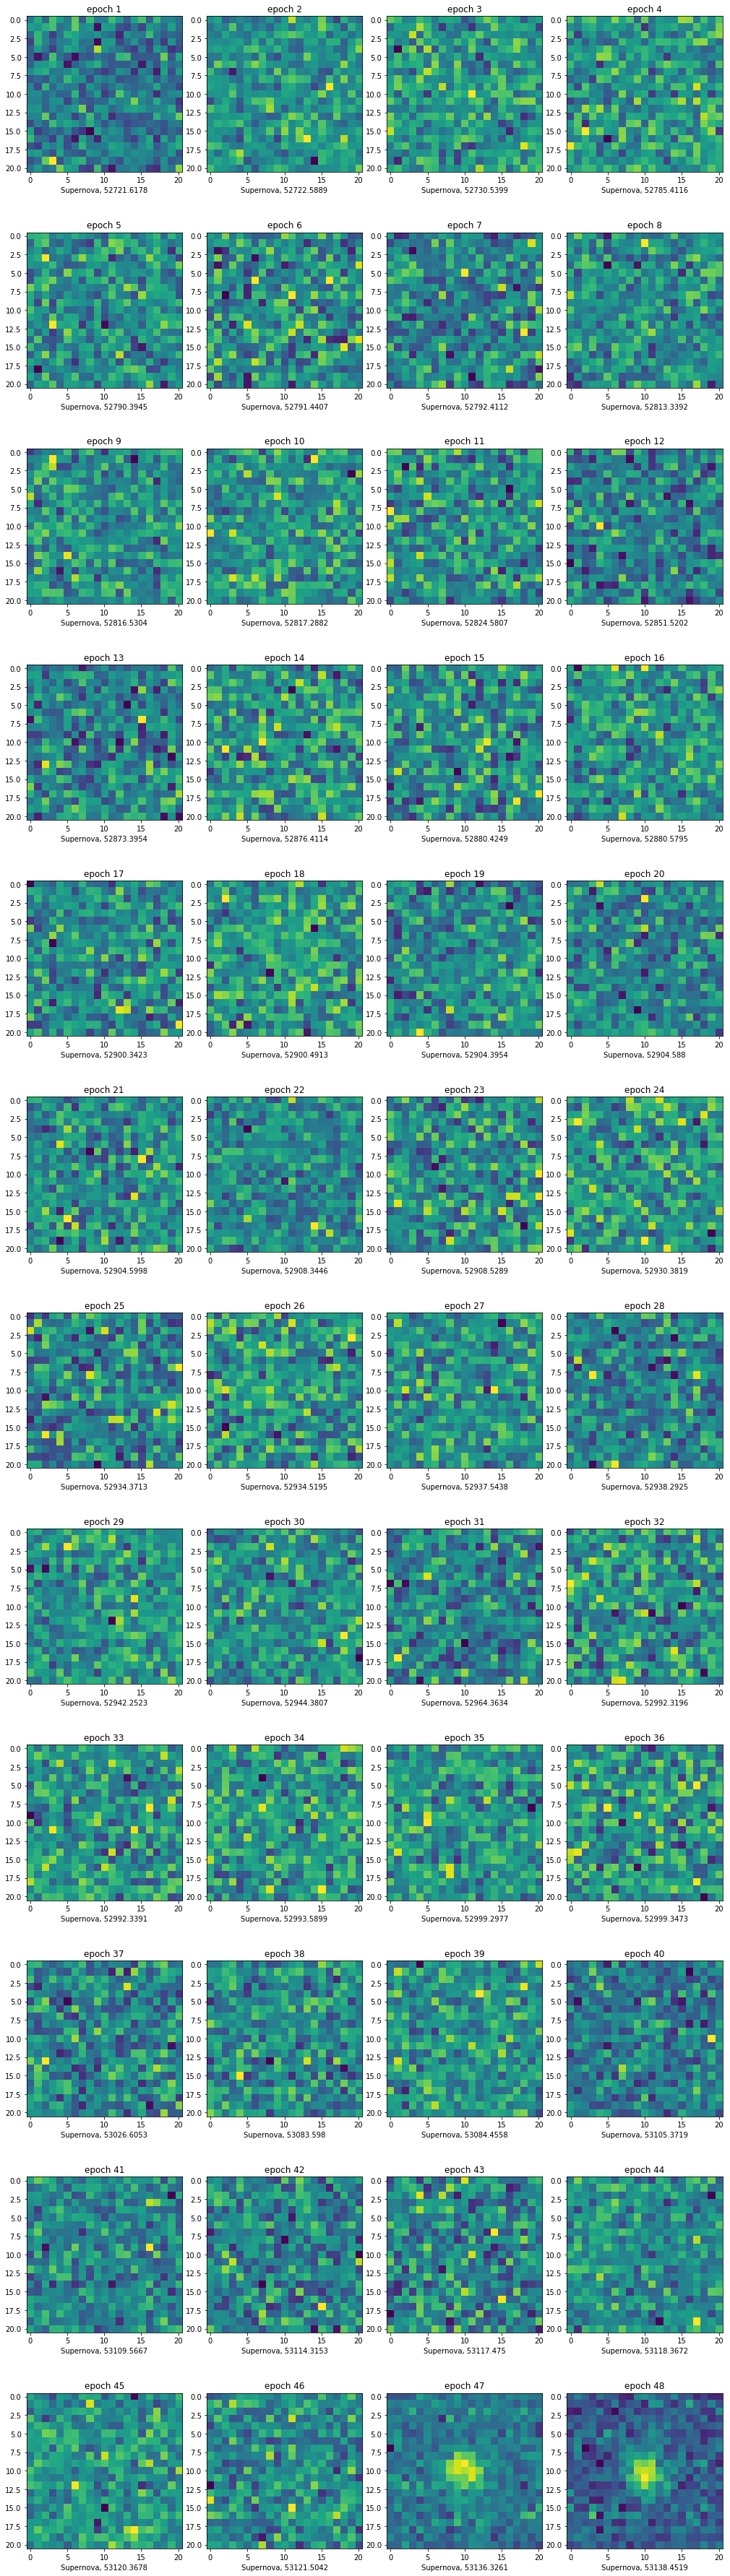

In [30]:
show_sample_trajectory(images[9], labels[9], obs_days)

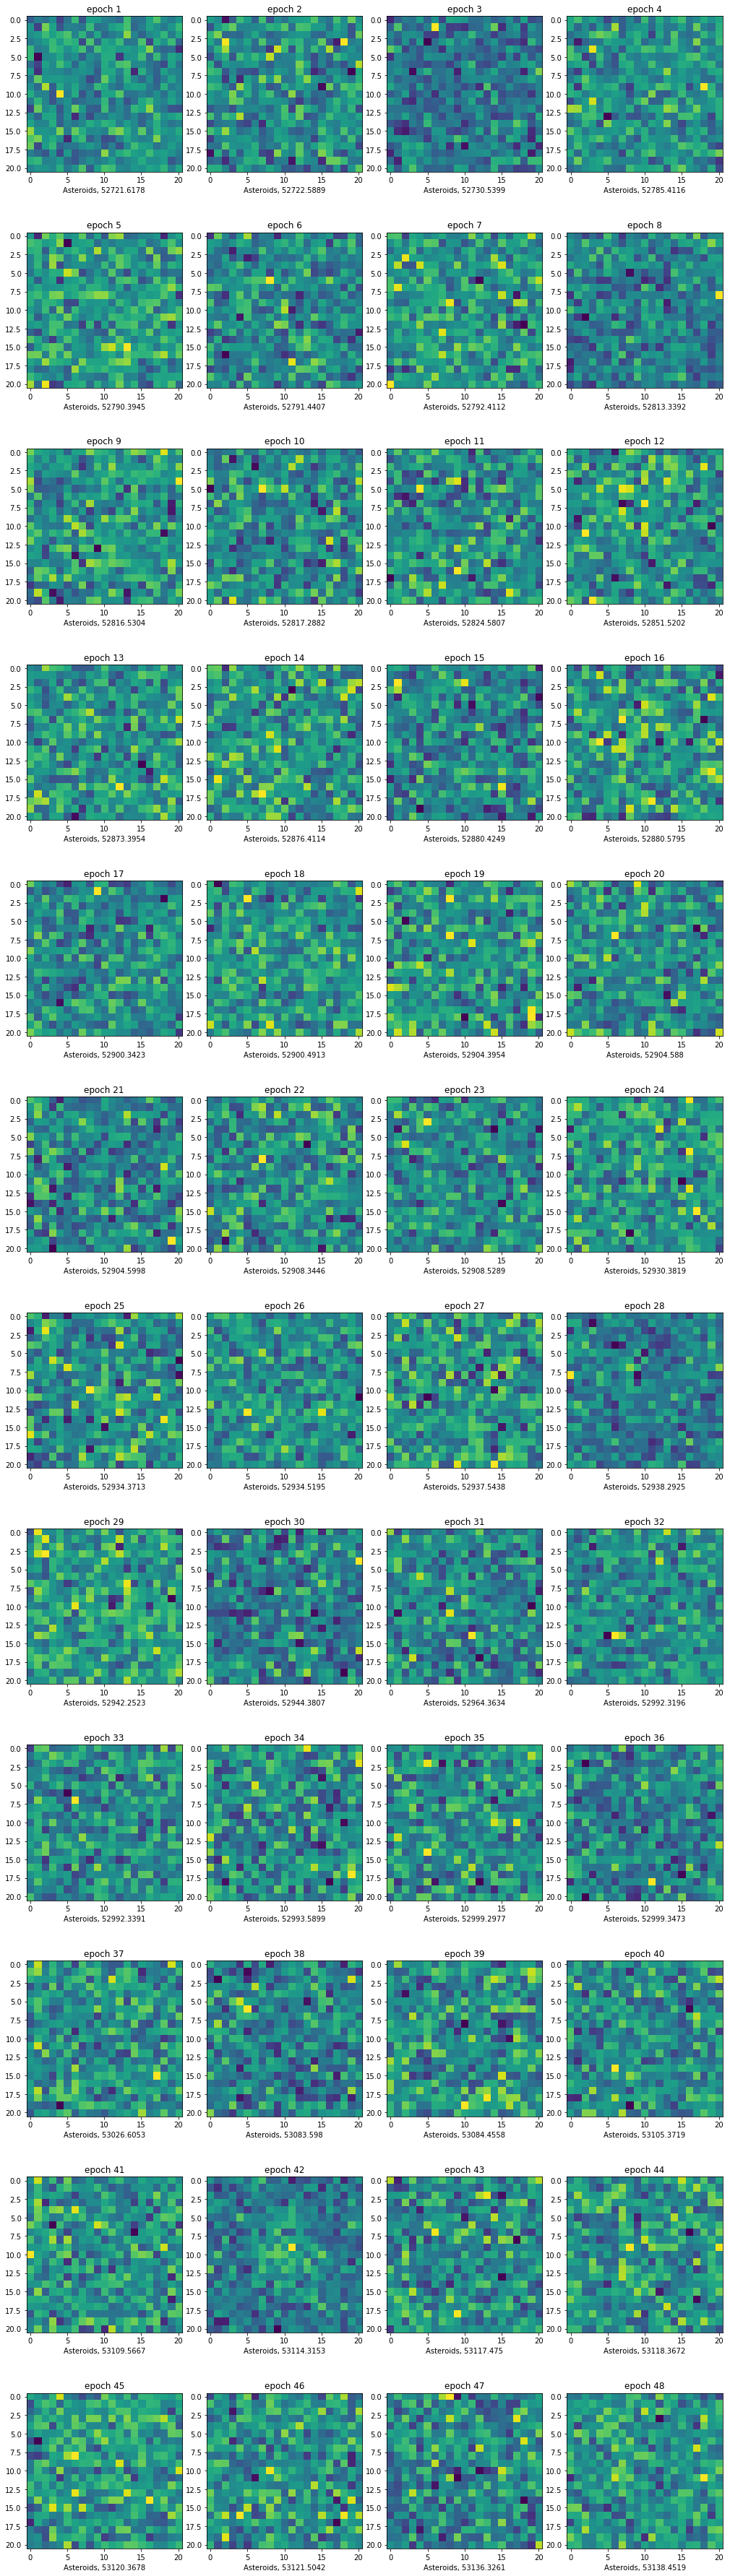

In [31]:
show_sample_trajectory(images[4], labels[4], obs_days)

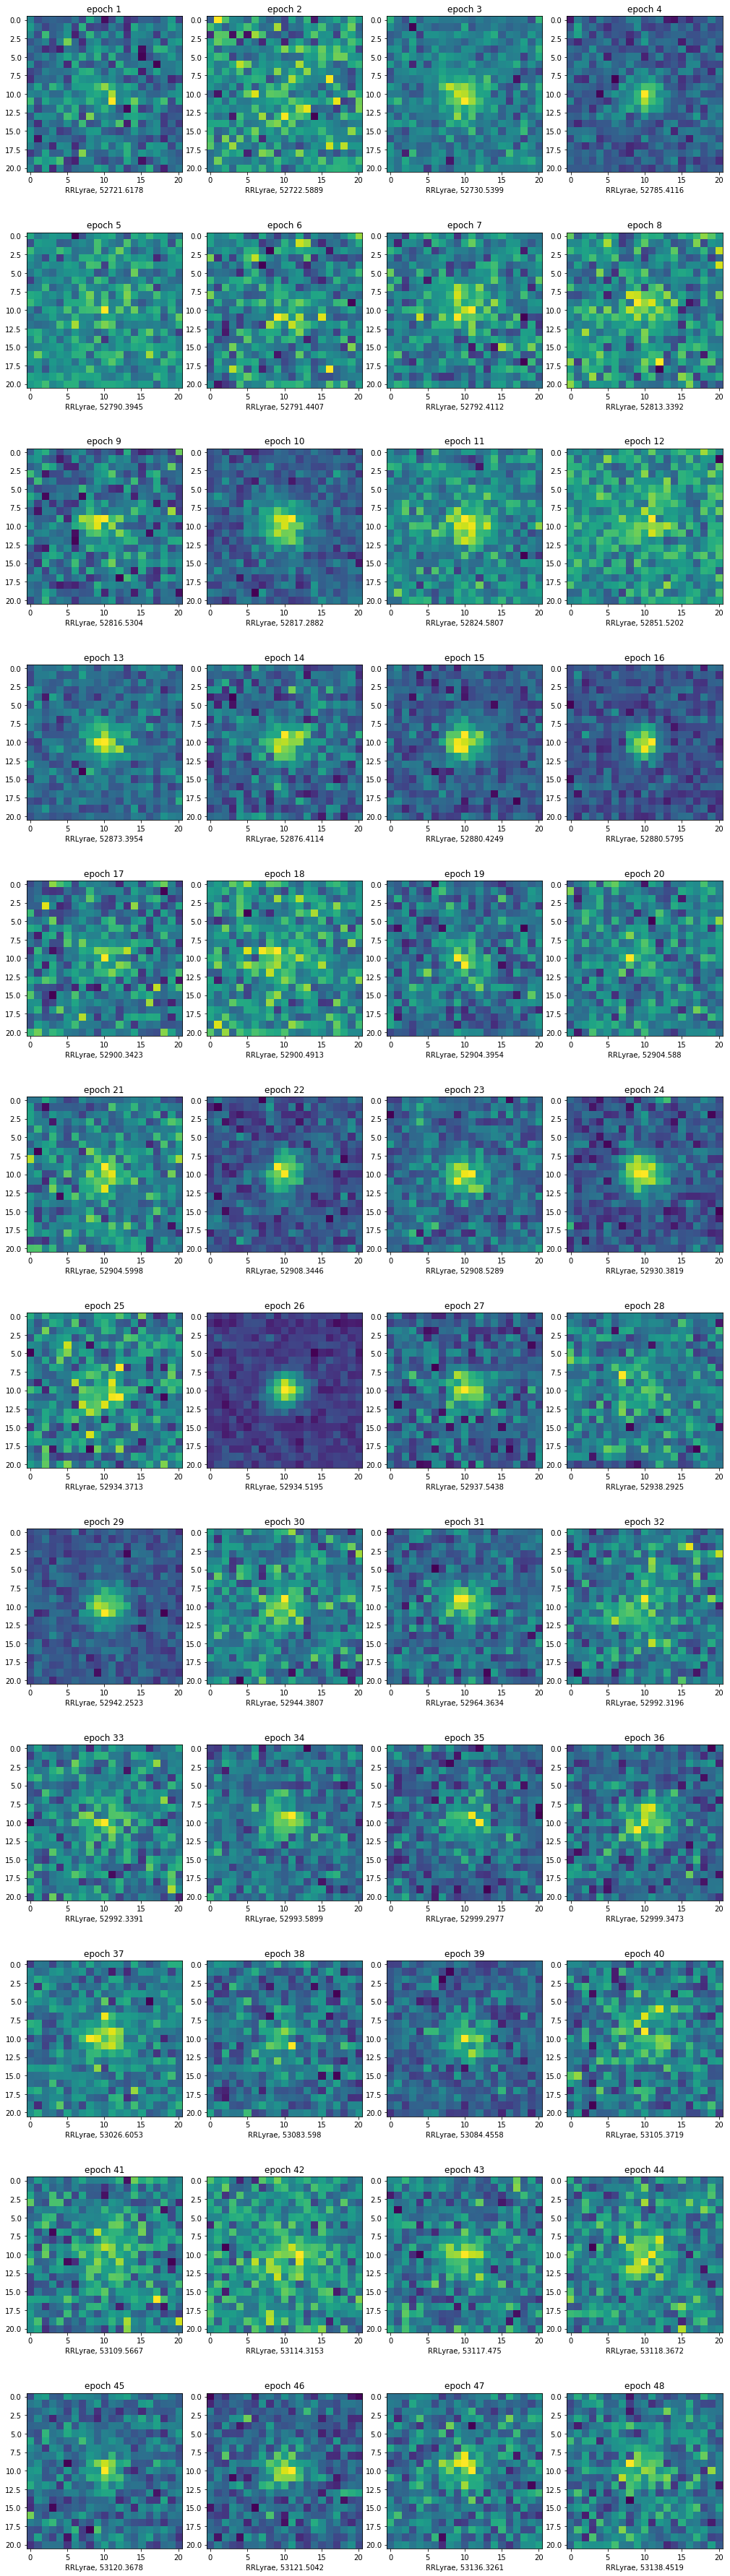

In [32]:
show_sample_trajectory(images[21], labels[21], obs_days)

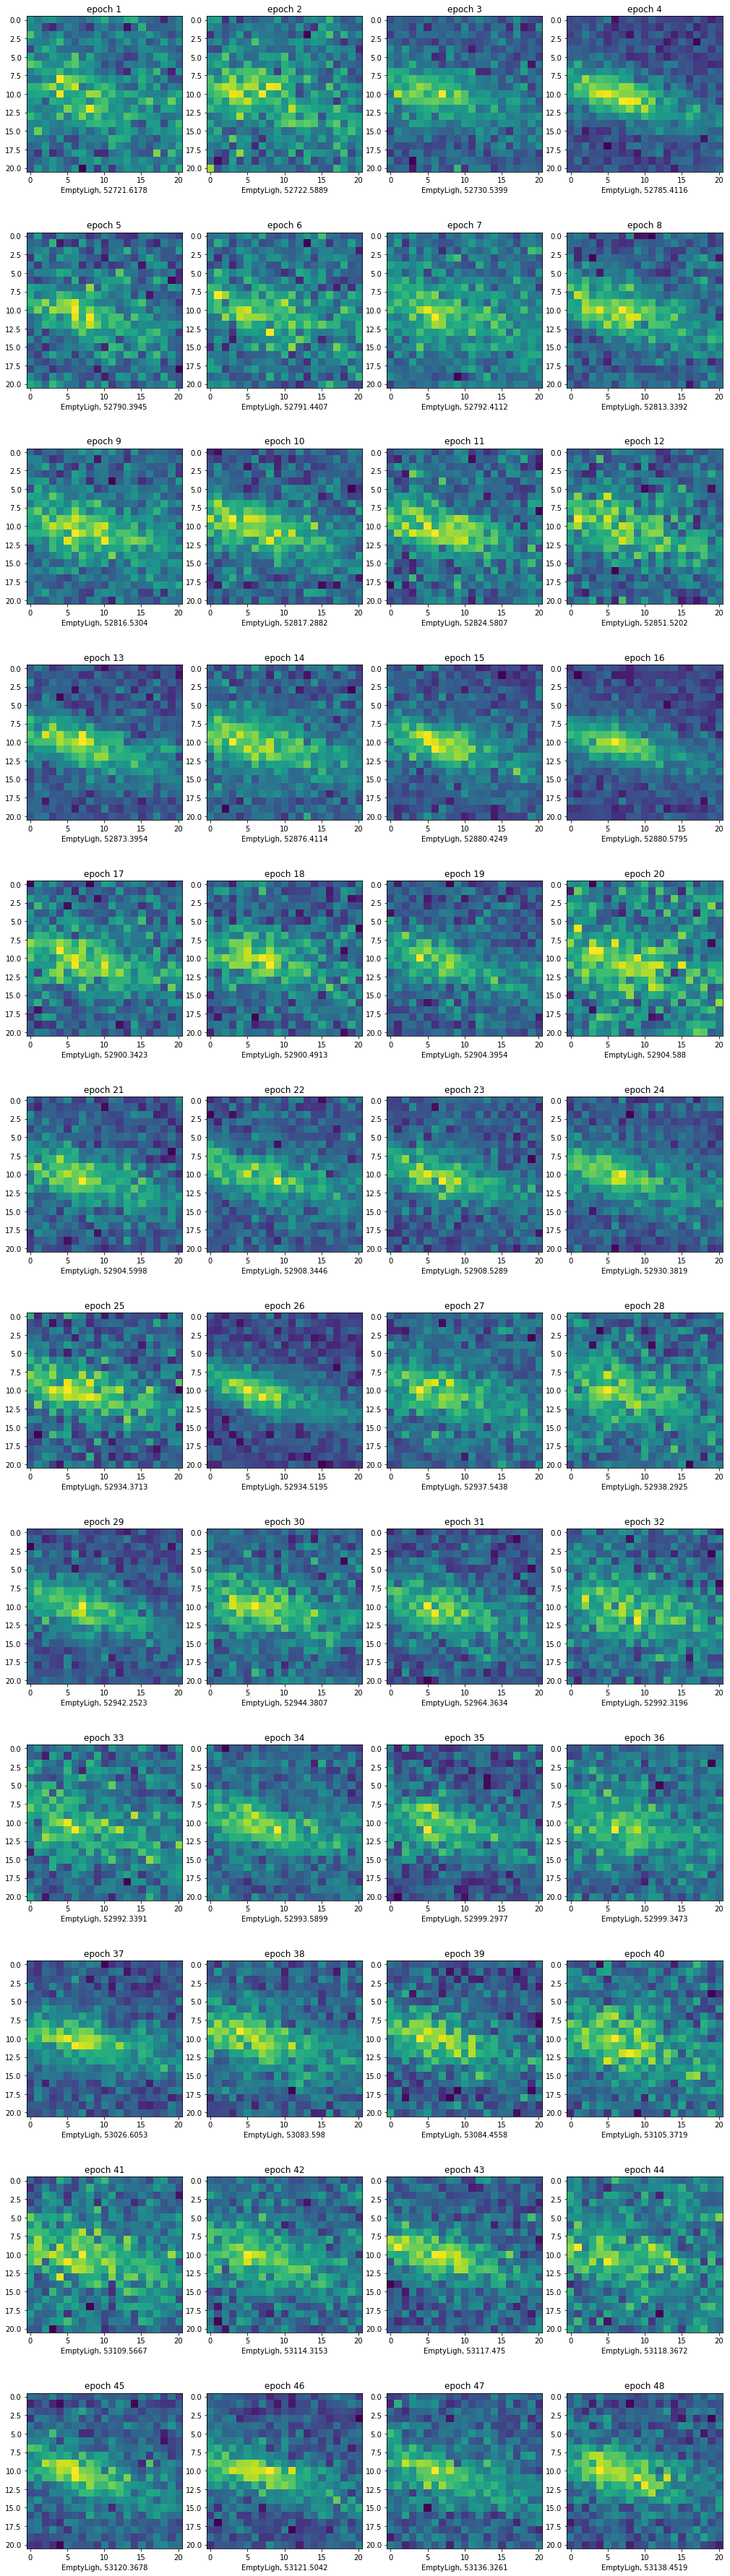

In [34]:
show_sample_trajectory(images[6], labels[6], obs_days)

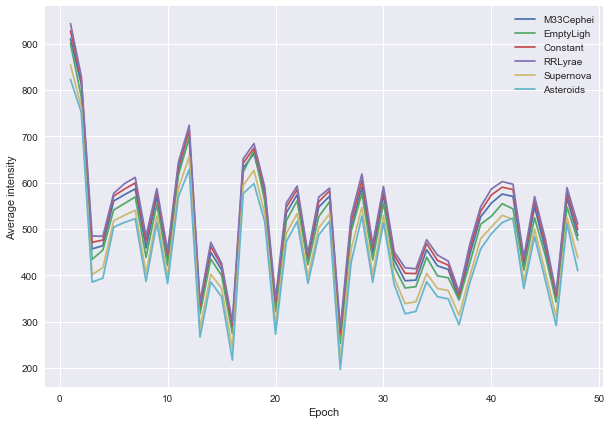

In [23]:
plt.figure(figsize=(10,7))
for label in set(labels):
    images_l = images[labels==label, :, :, :]
    print(images_1[0,0,0,:])
    means = np.mean(images_l, axis=(0,1,2))
    plt.plot(range(1,49), means, label=label)

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average intensity')

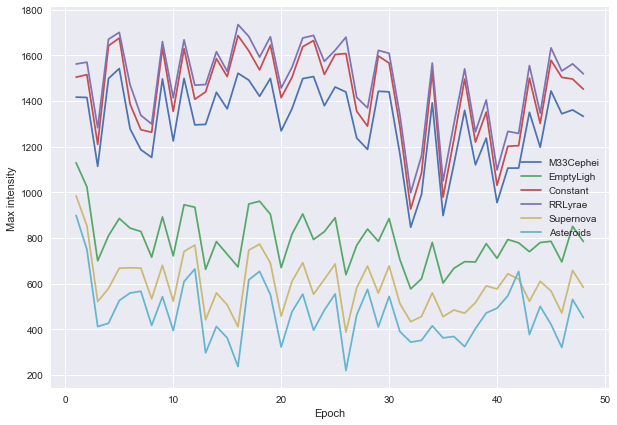

In [62]:
plt.figure(figsize=(10,7))
for label in set(labels):
    images_l = images[labels==label, :, :, :]
    maxx = np.max(images_l, axis=(1,2)).mean(0)
    plt.plot(range(1,49), maxx, label=label)

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Max intensity')

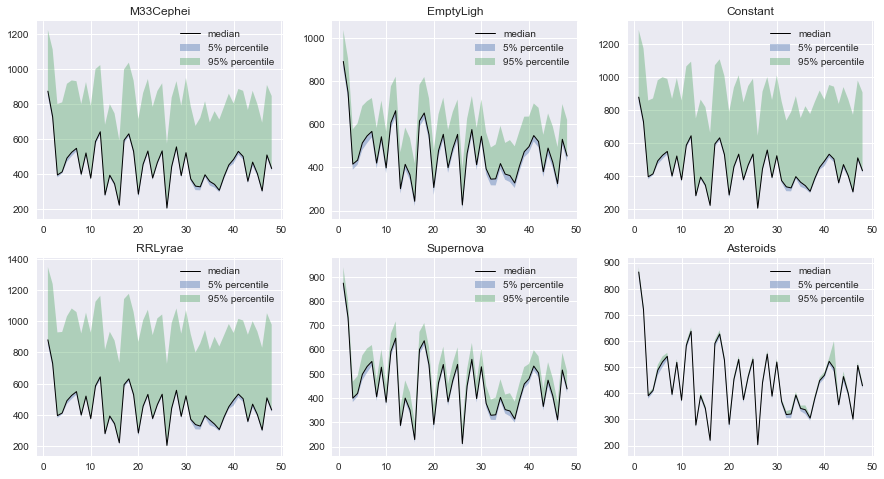

In [60]:
plt.figure(figsize=(15, 8))
for i,label in enumerate(set(labels)):
    
    images_l = images[labels==label, :, :, :]
    median = np.percentile(images_l, 50, axis=(1,2)).mean(0)
    perc75 = np.percentile(images_l, 95, axis=(1,2)).mean(0)
    perc25 = np.percentile(images_l, 5, axis=(1,2)).mean(0)
    
    plt.subplot(2, 3, i+1)
    plt.plot(range(1,49), median, color='black', label='median', linewidth=1)
    plt.fill_between(range(1,49), median, perc25, label='5% percentile', alpha=0.4)
    plt.fill_between(range(1,49), median, perc75, label='95% percentile', alpha=0.4)
    plt.title(label)
    plt.legend()